<a href="https://colab.research.google.com/github/KamilShape/heart_disease_classification/blob/main/heart_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
#libraries import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [3]:
!git clone https://github.com/KamilShape/data_bases

Cloning into 'data_bases'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 17 (delta 4), reused 15 (delta 2), pack-reused 0
Unpacking objects: 100% (17/17), 8.17 MiB | 4.99 MiB/s, done.


In [5]:
heart = pd.read_csv('data_bases/heart.csv')

SETTINGS

In [19]:
plt.style.use('bmh')

DATA BASE ANALYSIS

In [34]:
#data base
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age range
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,50-60
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,50-60
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,60-70
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,60-70
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,60-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,50-60
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,50-60
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,40-50
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,40-50


(array([  4.,  39., 109., 125., 120., 205., 219., 149.,  46.,   9.]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <BarContainer object of 10 artists>)

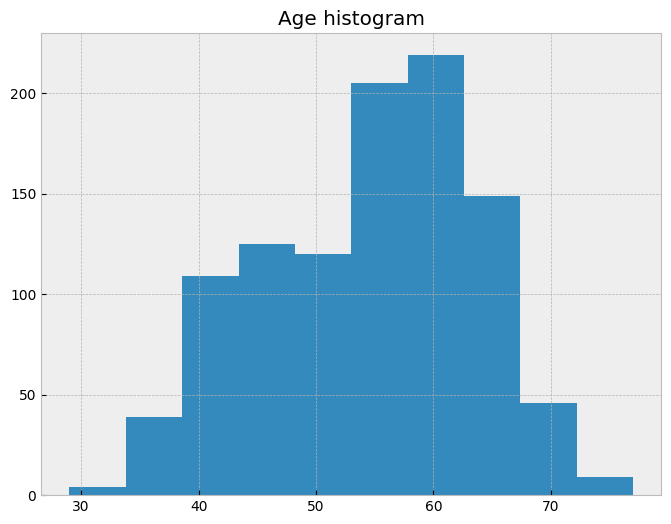

In [28]:
#age histogram
fig, ax = plt.subplots(figsize = (8,6))
ax.set_title('Age histogram')
ax.hist(heart['age'])
# ax.xaxis.set_ticks(np.arange(25, 80, 1))

In [29]:
#shapiro - wilk test
shapiro_test = stats.shapiro(heart['age'])
shapiro_test.pvalue
#p<0,05 - no bell curve

5.04160047043456e-09

In [35]:
#add age range column
heart['age range'] = pd.cut(x = heart['age'], 
                            bins = [20,30,40,50,60,70,80], 
                            labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

In [73]:
#sorted postive tests by age range
positive_group = heart[heart['target'] == 1]
sorted_positive_group = pd.DataFrame(positive_group['age range'].value_counts().values, positive_group['age range'].value_counts().index).reset_index().sort_values(by='index')
sorted_positive_group.columns = ['age range', 'tests number'] 
sorted_positive_group

,age range,tests number
5,20-30,4
3,30-40,41
1,40-50,166
0,50-60,204
2,60-70,94
4,70-80,17
